# Plot Impulse Response (IR) with zoom

In [1]:
import essentia
import essentia.standard as estd
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['axes.grid'] = True

: 

In [ ]:
sample_rate = 48000

In [ ]:
loader = estd.MonoLoader(filename = '../audio/IR_AKG_BX25_3500ms_48kHz24b.wav')
bx20_ir = loader()

In [ ]:
def plot_impulse_with_zoom(data, sample_rate, zoom_factor=0.01):
    """
    Plot the waveform and zoom in on the impulse.

    Parameters:
    - data: The impulse signal data.
    - sample_rate: The sample rate of the data.
    - zoom_factor: The fraction of the total duration to show around the impulse.
    """

    # Identify where the impulse is (find the sample with the highest absolute amplitude)
    impulse_index = np.argmax(np.abs(data))

    # Compute the number of samples to show around the impulse for zooming
    samples_to_show = int(sample_rate * zoom_factor)

    # Define start and end indices for the zoomed view
    start_index = max(0, impulse_index - samples_to_show // 2)
    end_index = min(len(data) - 1, impulse_index + samples_to_show // 2)

    # Create plots
    fig, axs = plt.subplots(2, 1, figsize=(10, 6))

    # Full waveform
    axs[0].plot(data)
    axs[0].set_title("Full Waveform")
    axs[0].set_xlabel("Samples")
    axs[0].set_ylabel("Amplitude")

    # Zoomed-in waveform
    axs[1].plot(range(start_index, end_index), data[start_index:end_index])
    axs[1].set_title("Zoomed-In on Impulse")
    axs[1].set_xlabel("Samples")
    axs[1].set_ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

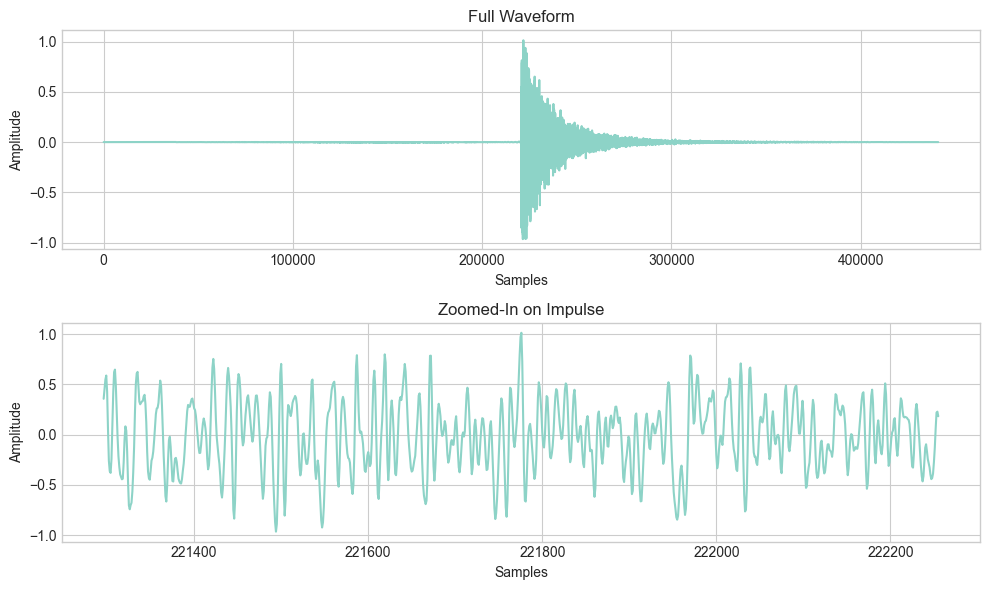

In [ ]:
# Test with the impulse signal from the previous code snippet
plot_impulse_with_zoom(bx20_ir, sample_rate)

In [ ]:
def plot_impulse_and_spectrogram(data, sample_rate, zoom_factor=0.01):
    """
    Plot the waveform, zoom in on the impulse, and display its traditional spectrogram.

    Parameters:
    - data: The impulse signal data.
    - sample_rate: The sample rate of the data.
    - zoom_factor: The fraction of the total duration to show around the impulse.
    """

    # Identify where the impulse is (find the sample with the highest absolute amplitude)
    impulse_index = np.argmax(np.abs(data))

    # Compute the number of samples to show around the impulse for zooming
    samples_to_show = int(sample_rate * zoom_factor)

    # Define start and end indices for the zoomed view
    start_index = max(0, impulse_index - samples_to_show // 2)
    end_index = min(len(data) - 1, impulse_index + samples_to_show // 2)

    # Extract zoomed data
    zoomed_data = data[start_index:end_index]

    # Compute the spectrogram of the zoomed data
    f, t, Sxx = signal.spectrogram(zoomed_data, fs=sample_rate)

    # Create plots
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))

    # Full waveform
    axs[0].plot(data)
    axs[0].set_title("Full Waveform")
    axs[0].set_xlabel("Samples")
    axs[0].set_ylabel("Amplitude")

    # Zoomed-in waveform
    axs[1].plot(range(start_index, end_index), zoomed_data)
    axs[1].set_title("Zoomed-In on Impulse")
    axs[1].set_xlabel("Samples")
    axs[1].set_ylabel("Amplitude")

    # Traditional spectrogram
    cmap = plt.get_cmap('inferno')
    min_magnitude = 10 * np.log10(np.min(Sxx))
    max_magnitude = 10 * np.log10(np.max(Sxx))
    for i in range(len(t)):
        magnitudes = 10 * np.log10(Sxx[:, i])
        normalized = (magnitudes - min_magnitude) / (max_magnitude - min_magnitude)
        colors = cmap(normalized)
        axs[2].vlines(t[i], f[0], f[-1], colors=colors, lw=2, linestyles='solid')
        
    axs[2].set_title("Spectrogram")
    axs[2].set_ylabel("Frequency [Hz]")
    axs[2].set_xlabel("Time [sec]")

    plt.tight_layout()
    plt.show()

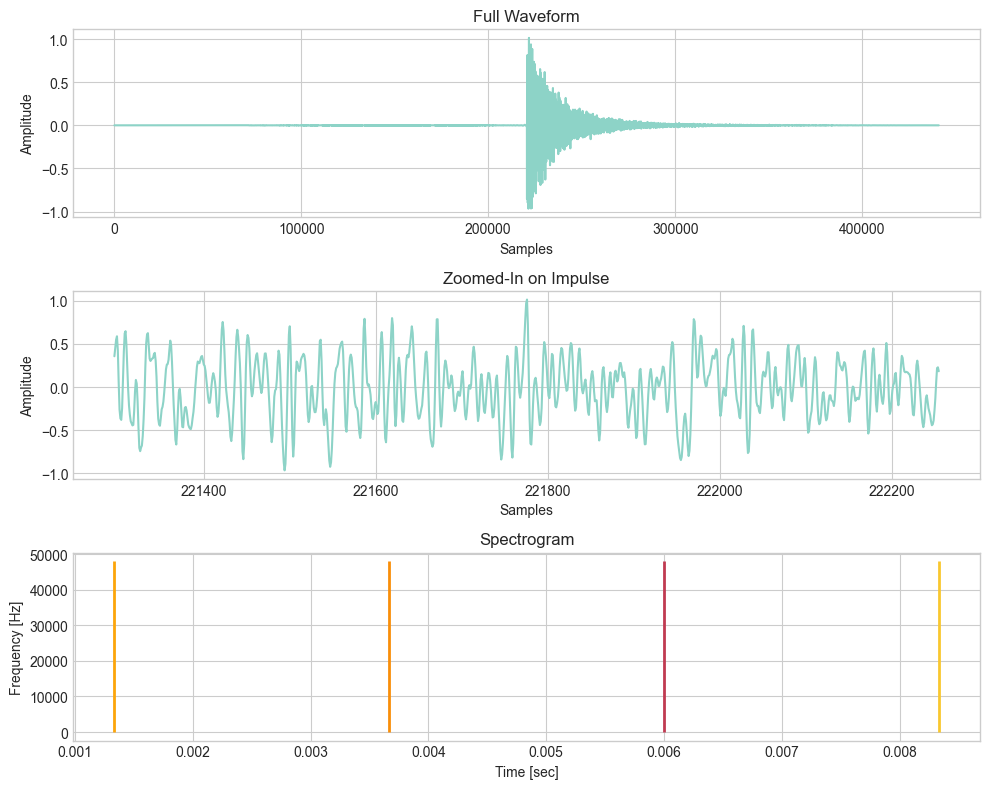

In [ ]:
# Replace the following with your actual data and sample rate.
plot_impulse_and_spectrogram(bx20_ir, sample_rate, zoom_factor=0.01)